# **Model Training using Neural Network Algorithm**
We visualized the training process and evaluated the model using accuracy/loss curves, confusion matrix, classification report, and ROC curves. These plots demonstrate that the neural network achieves **[insert your performance here]** on the three-class classification problem, with especially strong performance for class **[X]**. The model does not show signs of severe overfitting, and ROC curves confirm its strong discriminative power.

## Importing of libraries

In [1]:
import numpy as np
import tensorflow as tf
from dataclasses import dataclass
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from pathlib import Path

2025-10-11 21:54:21.474666: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760212461.485654  955891 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760212461.488956  955891 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-11 21:54:21.502685: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading Data from previous step (Data preparation)

In [2]:
SAVE_DIR = Path("../output/data_preparation_outputs")

if SAVE_DIR.exists():
    X = np.load(SAVE_DIR / 'X.npy')
    y = np.load(SAVE_DIR / 'y.npy')
    surface_roughness_ra = np.load(SAVE_DIR / 'ra.npy')
    names = np.load(SAVE_DIR / 'name.npy')
    idx = np.arange(len(X))
    X_train, X_test, y_train, y_test, idx_train, idx_test, surface_roughness_ra_train, surface_roughness_ra_test, names_train, names_test = train_test_split(X, y,idx,surface_roughness_ra,names ,test_size=0.2, random_state=42, stratify=y)
else:
    raise Exception("At least one file could not be imported")

## Training Hyperparameters

In [3]:
@dataclass
class TrainingParams:
    """
    Hyperparameters defoinition for the training process

    """
    USE_ONEHOT: bool = True
    learning_rate: float = 0.01
    test_size: float = 0.2
    batch_size: int = 512
    number_hidden_layer: int = 1
    number_neuron_hidden_layer: int = 10
    epochs: int = 5000
    metric_list = ['accuracy']

training_params = TrainingParams()

## Encoding Target Variable

In [4]:
if training_params.USE_ONEHOT:
    encoder = OneHotEncoder(sparse_output=False)
    y_train_enc = encoder.fit_transform(y_train.reshape(-1,1))
    y_test_enc = encoder.transform(y_test.reshape(-1,1))
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
else:
    y_train_enc = y_train
    y_test_enc = y_test
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()


# Convenience function for model definition and training process

In [5]:
def set_model(input_dim, params: TrainingParams):
    """
    Setting neural network model with one hidden layer of 10 neurons : just for testing
    """
    model = tf.keras.models.Sequential()
    # Hidden layers
    for _ in range(params.number_hidden_layer):
        model.add(tf.keras.layers.Dense(units=params.number_neuron_hidden_layer, activation='relu', input_dim=input_dim))
        input_dim = None  
    # Output layer
    model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
    return model

model = set_model(X_train.shape[1], training_params)

/home/sourabie/Thesis/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1760212463.420392  955891 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# Function for Training of the model

In [6]:
def train_model(model, train_set, test_set, params: TrainingParams, loss):
    optimizer = tf.keras.optimizers.Adam(learning_rate=params.learning_rate)
    model.compile(optimizer=optimizer, loss=loss, metrics=params.metric_list)
    history = model.fit(
        train_set[0], train_set[1],
        batch_size=params.batch_size,
        epochs=params.epochs,
        validation_data=test_set
    )
    return model, history

# Train model

In [7]:
train_labels = y_train_enc
test_labels = y_test_enc
trained_model, history = train_model( model, (X_train, train_labels), (X_test, test_labels), training_params, loss_fn)

Epoch 1/5000


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4939 - loss: 1.0174 - val_accuracy: 0.6328 - val_loss: 0.7964
Epoch 2/5000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6258 - loss: 0.7841 - val_accuracy: 0.6475 - val_loss: 0.7113
Epoch 3/5000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6569 - loss: 0.7101 - val_accuracy: 0.6616 - val_loss: 0.6799
Epoch 4/5000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6570 - loss: 0.6777 - val_accuracy: 0.6704 - val_loss: 0.6638
Epoch 5/5000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6711 - loss: 0.6588 - val_accuracy: 0.6757 - val_loss: 0.6513
Epoch 6/5000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6705 - loss: 0.6505 - val_accuracy: 0.6716 - val_loss: 0.6428
Epoch 7/5000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6808 - loss: 0.6385 - val_accuracy: 0.6774 - val_loss: 0.6339
Epoch 8/5000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6921 - loss: 0.6135 - val_accuracy: 0.6745 - val_l

# Saving Trained Model and Training History

In [8]:
SAVE_DIR = Path("../output/training_outputs")
SAVE_DIR.mkdir(parents=True, exist_ok=True)

trained_model.save(SAVE_DIR / 'nn_model.h5')
np.save(SAVE_DIR / 'train_history.npy', history.history)
print(trained_model.input_shape)     
print(trained_model.output_shape)   
print(X_test.shape)                  
print(trained_model.predict(X_test[:5]).shape) 

(None, 42)
(None, 3)
(1702, 42)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
(5, 3)


# Visualizytion of training


*   These plots show how well the model learns and generalizes


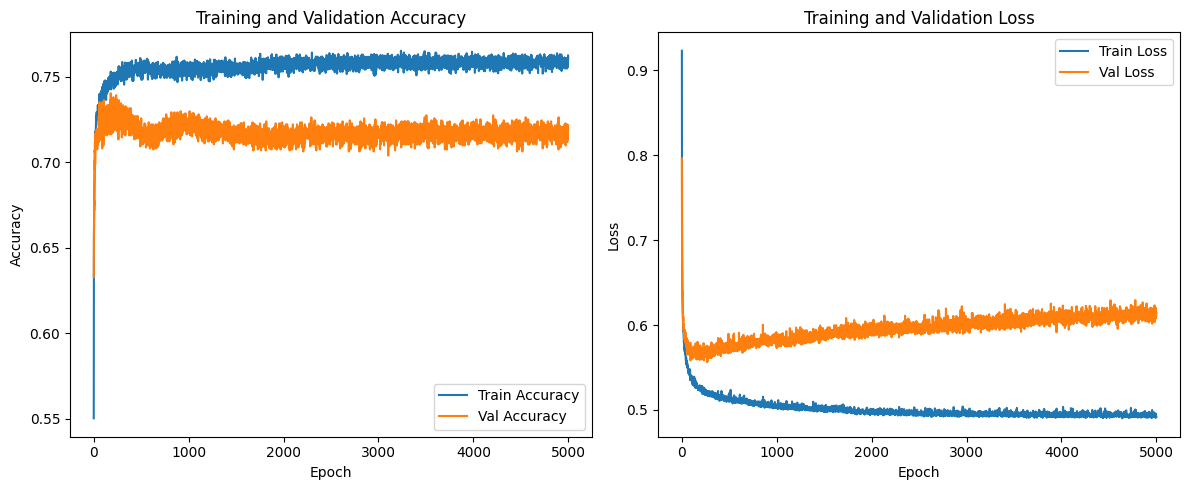

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# history_dict = np.load('train_history.npy', allow_pickle=True).item()
history_dict = history.history

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig(SAVE_DIR / 'training_validation_curves.png')


# Confusion Matrix


*   The confusion matrix shows the count of correct and incorrect predictions for each class
*   High values along the diagonal mean the model predicts that class accurately



54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step


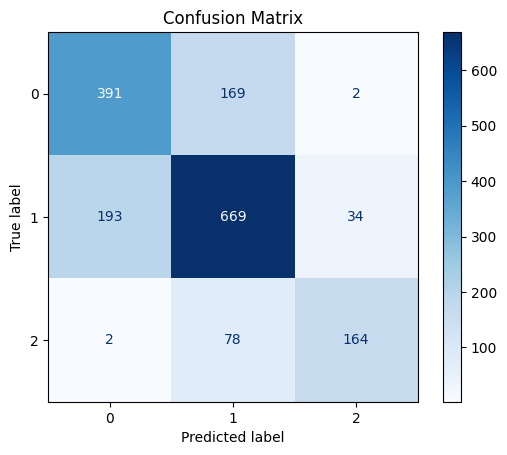

<Figure size 640x480 with 0 Axes>

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred_proba = trained_model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
if y_test.ndim > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

cm = confusion_matrix(y_test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
plt.savefig(SAVE_DIR / 'confusion_matrix.png')

# Classification Report

*   This report gives precision, recall, and F1-score for each class, providing a more detailed performance breakdown than accuracy alone.


In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test_labels, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))


              precision    recall  f1-score   support

     Class 0       0.67      0.70      0.68       562
     Class 1       0.73      0.75      0.74       896
     Class 2       0.82      0.67      0.74       244

    accuracy                           0.72      1702
   macro avg       0.74      0.70      0.72      1702
weighted avg       0.72      0.72      0.72      1702



# ROC Curves


*   ROC curves illustrate the model’s ability to distinguish each class from the others. Higher AUC values indicate better discriminative performance



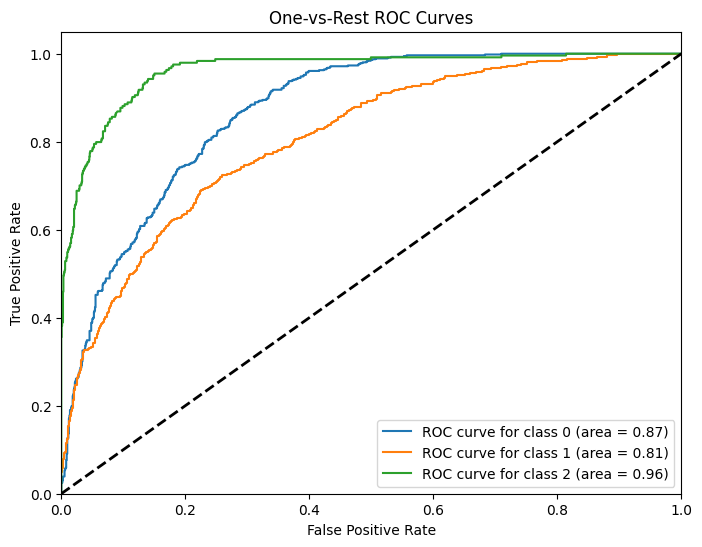

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

n_classes = 3
# Binarize the output
y_test_bin = label_binarize(y_test_labels, classes=[0,1,2])
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curves')
plt.legend(loc="lower right")
plt.show()

# Save Results

In [13]:
np.save(SAVE_DIR / 'X_test.npy', X_test)
np.save(SAVE_DIR / 'X_train.npy', X_train)
np.save(SAVE_DIR / 'y_test.npy', y_test)
np.save(SAVE_DIR / 'idx_train.npy', idx_train)
np.save(SAVE_DIR / 'idx_test.npy', idx_test)
np.save(SAVE_DIR / 'surface_roughness_ra_train.npy', surface_roughness_ra_train)
np.save(SAVE_DIR / 'surface_roughness_ra_test.npy', surface_roughness_ra_test)
np.save(SAVE_DIR / 'names_train.npy', names_train)
np.save(SAVE_DIR / 'names_test.npy', names_test) 
plt.savefig(SAVE_DIR / 'roc_curves.png')

<Figure size 640x480 with 0 Axes>